In [24]:
# ... time to move to python3 dude
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [25]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [27]:
mnist.train.images.shape

(55000, 784)

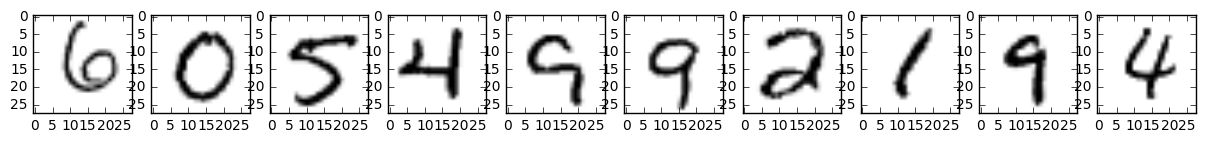

In [28]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [30]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=500, nb_epoch=10, verbose=1,
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 0s - loss: 1.1739 - acc: 0.7129 - val_loss: 0.6519 - val_acc: 0.8605
Epoch 2/10
55000/55000 [==============================] - 0s - loss: 0.5670 - acc: 0.8658 - val_loss: 0.4676 - val_acc: 0.8904
Epoch 3/10
55000/55000 [==============================] - 0s - loss: 0.4518 - acc: 0.8861 - val_loss: 0.3993 - val_acc: 0.9021
Epoch 4/10
55000/55000 [==============================] - 0s - loss: 0.3995 - acc: 0.8965 - val_loss: 0.3627 - val_acc: 0.9068
Epoch 5/10
55000/55000 [==============================] - 0s - loss: 0.3684 - acc: 0.9027 - val_loss: 0.3402 - val_acc: 0.9106
Epoch 6/10
55000/55000 [==============================] - 0s - loss: 0.3478 - acc: 0.9076 - val_loss: 0.3246 - val_acc: 0.9120
Epoch 7/10
55000/55000 [==============================] - 0s - loss: 0.3330 - acc: 0.9105 - val_loss: 0.3145 - val_acc: 0.9154
Epoch 8/10
55000/55000 [==============================] - 0s 

In [33]:
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.292820737171
Test accuracy: 0.9195


In [34]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict_on_batch(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 0.004289058,
 1: 0.002338934,
 2: 0.037375294,
 3: 0.003359586,
 4: 0.0032393453,
 5: 0.00044779442,
 6: 0.93981147,
 7: 0.0010234708,
 8: 0.0063920552,
 9: 0.00172305}

In [35]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

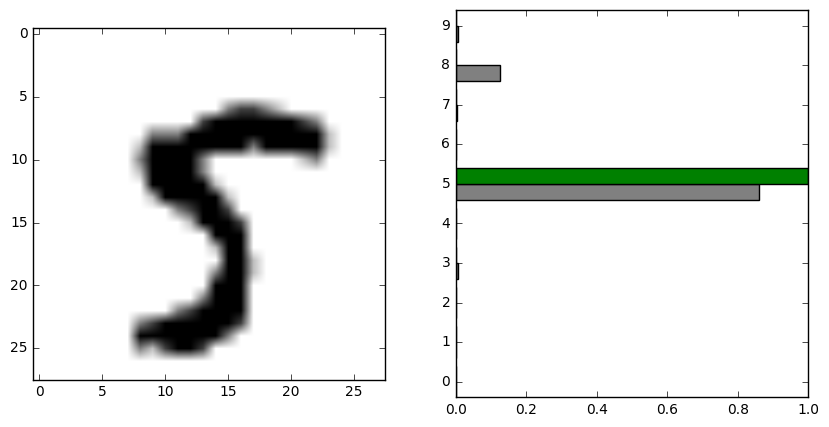

In [36]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)